<a href="https://colab.research.google.com/github/CsCheems/AirQuality-HeartDisease/blob/master/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
#cargamos el archivo local
from google.colab import files
archivo = files.upload()

for filename in archivo.keys():
  print(filename)

#leemos el archivo cargado
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')
df = df.iloc[:, :-2]
df = df.replace(-200, np.nan)

df = df.dropna()

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [49]:
features = [
    'C6H6(GT)',
    'NOx(GT)',
    'NO2(GT)',
    'T',
    'RH',
    'AH'
]

target = 'CO(GT)'

columnas_relevantes = features + [target]
df[columnas_relevantes] = df[columnas_relevantes].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=columnas_relevantes)

X = df[features]
y= df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = modelo.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.061542927697344055
R2: 0.9704354563943106


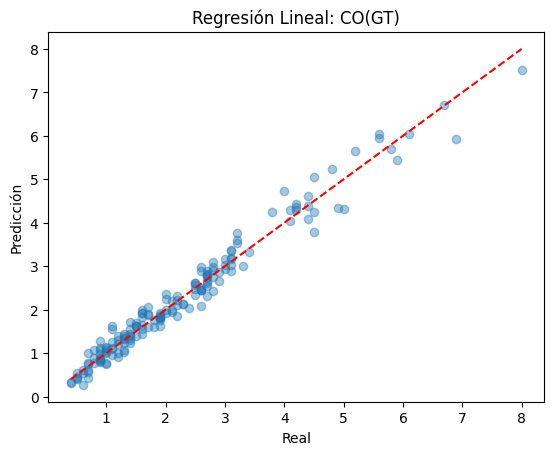

In [51]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Regresión Lineal: CO(GT)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()